In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean

## Example 1
### Construct the model

$$Y=\beta X_1+\varepsilon_y$$
$$X_1 \sim \mathcal{N}(\mu_1,1)$$
$$X_2=\alpha X_1+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,1)$$

$$\tilde{P}^{\mu_1,\alpha,\beta}(dX_1,dX_2,dY)=P^{\mu_1}(dX_1)W_{X_1}^{\alpha}(dX_2)Q_{X_1}^{\beta}(dy)$$

 Apply h on the man of X1 and the variance of X2

In [83]:
#original risk function
def riskf(n):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=1
        X1.append(np.random.normal(mu1, 1, 1))
        X2.append(alpha*X1[i]+np.random.normal(0, 1, 1))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

#use both X1 and X2
def risk_both(n,h):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=1
        X1.append(np.random.normal(h*mu1, 1, 1))
        X2.append(alpha*X1[i]+np.random.normal(0, h, 1))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

#use only X1
def risk_x1(n,h):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        mu1=np.random.normal(0, 1, 1)
        alpha=np.random.normal(0, 1, 1)
        beta=1
        X1.append(np.random.normal(h*mu1, 1, 1))
        Y.append(beta*X1[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

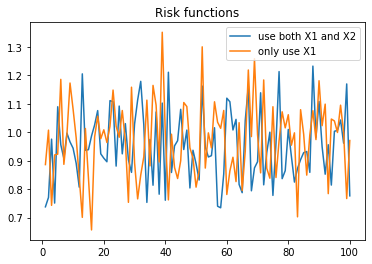

In [86]:
list1=[]
list2=[]

for i in range(100):
    list1.append(risk_both(100,200000))
    list2.append(risk_x1(100,200000))
       
plt.figure()    
plt.plot(range(1,101),list1,label='use both X1 and X2')
plt.plot(range(1,101),list2,label='only use X1')
#plt.plot(range(1,101),list3,label='original')
plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

## Example 2
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= X_1+\varepsilon_y$$
$$X_2=Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 

 Apply h on the variance of X1 

In [87]:
#use both X1 and X2
def risk_both(n,sigma):
    X1=[]
    Y=[]
    X2=[]
    for i in range(n):
        X1.append(np.random.normal(0, sigma, 1))
        Y.append(X1[i]+np.random.normal(0, sigma, 1))
        X2.append(Y[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X1, X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

#use only X1
def risk_x1(n,sigma):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        X1.append(np.random.normal(0, sigma, 1))
        Y.append(X1[i]+np.random.normal(0, sigma, 1))
    X=np.hstack([X1])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

#use only X2
def risk_x2(n,sigma):
    X1=[]
    X2=[]
    Y=[]
    for i in range(n):
        X1.append(np.random.normal(0, sigma, 1))
        Y.append(X1[i]+np.random.normal(0, sigma, 1))
        X2.append(Y[i]+np.random.normal(0, 1, 1))
    X=np.hstack([X2])
    y=np.hstack([Y])
    reg=LinearRegression().fit(X, y)
    pred=reg.predict(X)
    return sum((Y-pred)**2)/n

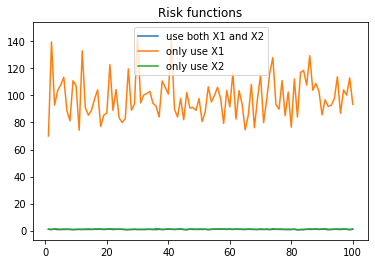

In [93]:
list1=[]
list2=[]
list3=[]

for i in range(100):
    list1.append(risk_both(100,10))
    list2.append(risk_x1(100,10))
    list3.append(risk_x2(100,10))
    
    
plt.figure()    
plt.plot(range(1,101),list1,label='use both X1 and X2')
plt.plot(range(1,101),list2,label='only use X1')
plt.plot(range(1,101),list3,label='only use X2')
plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()